## Data Processing

In [1]:
# Data = CMAPSSData
# Source = https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/
# Dataset = Turbofan Engine Degradation Simulation Data Set

In [2]:
# Data to be used - Train and Test data for 1

In [3]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

### Notebook options

In [4]:
pd.set_option('display.max_colwidth', -1) # Column width
plt.rcParams['figure.figsize'] = [15, 10] # Size of the plots

### Data Directories

In [5]:
INPUT_DIR = '../data/raw/CMAPSSData/'
OUTPUT_DIR = '../data/interim/'

### Read the input data

In [6]:
input_file = INPUT_DIR + 'train_FD004.txt'
col_headers = ['unit', 'time_cycles', 'setting1', 'setting2', 'setting3', 
              'meas01', 'meas02', 'meas03', 'meas04', 'meas05', 'meas06', 'meas07', 'meas08', 'meas09', 'meas10', 
              'meas11', 'meas12', 'meas13', 'meas14', 'meas15', 'meas16', 'meas17', 'meas18', 'meas19', 'meas20', 
              'meas21', 'meas22', 'meas23', 'meas24', 'meas25', 'meas26']

df_raw = pd.read_csv(input_file, header=None, sep=' ', names=col_headers)

In [7]:
df_raw.head()

,unit,time_cycles,setting1,setting2,setting3,meas01,meas02,meas03,meas04,meas05,...,meas17,meas18,meas19,meas20,meas21,meas22,meas23,meas24,meas25,meas26
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,330,2212,100.00,10.62,6.3670,NaN,NaN,NaN,NaN,NaN
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,361,2324,100.00,24.37,14.6552,NaN,NaN,NaN,NaN,NaN
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,329,2212,100.00,10.48,6.4213,NaN,NaN,NaN,NaN,NaN
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,328,2212,100.00,10.54,6.4176,NaN,NaN,NaN,NaN,NaN
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,305,1915,84.93,14.03,8.6754,NaN,NaN,NaN,NaN,NaN


In [8]:
cols = ['unit', 'time_cycles', 'setting1', 'setting2', 'setting3']
df_raw[cols].describe()

,unit,time_cycles,setting1,setting2,setting3
count,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000
mean,124.325181,134.311417,23.999823,0.571347,94.031576
std,71.995350,89.783389,14.780722,0.310703,14.251954
min,1.000000,1.000000,0.000000,0.000000,60.000000
25%,60.000000,62.000000,10.004600,0.250700,100.000000
50%,126.000000,123.000000,25.001400,0.700000,100.000000
75%,185.000000,191.000000,41.998100,0.840000,100.000000
max,249.000000,543.000000,42.008000,0.842000,100.000000


In [9]:
cols = ['meas01', 'meas02', 'meas03', 'meas04', 'meas05', 'meas06', 'meas07']
df_raw[cols].describe()

,meas01,meas02,meas03,meas04,meas05,meas06,meas07
count,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000
mean,472.882435,579.420056,1417.896600,1201.915359,8.031626,11.589457,283.328633
std,26.436832,37.342647,106.167598,119.327591,3.622872,5.444017,146.880210
min,445.000000,535.480000,1242.670000,1024.420000,3.910000,5.670000,136.170000
25%,445.000000,549.330000,1350.550000,1119.490000,3.910000,5.720000,142.920000
50%,462.540000,555.740000,1367.680000,1136.920000,7.050000,9.030000,194.960000
75%,491.190000,607.070000,1497.420000,1302.620000,10.520000,15.480000,394.280000
max,518.670000,644.420000,1613.000000,1440.770000,14.620000,21.610000,570.810000


In [10]:
cols = ['meas08', 'meas09', 'meas10', 'meas11', 'meas12', 'meas13', 'meas14']
df_raw[cols].describe()

,meas08,meas09,meas10,meas11,meas12,meas13,meas14
count,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000
mean,2228.686034,8524.673301,1.096445,42.874529,266.735665,2334.427590,8067.811812
std,145.348243,336.927547,0.127681,3.243492,138.479109,128.197859,85.670543
min,1914.720000,7984.510000,0.930000,36.040000,128.310000,2027.570000,7845.780000
25%,2211.950000,8320.590000,1.020000,41.760000,134.520000,2387.910000,8062.630000
50%,2223.070000,8362.760000,1.030000,42.330000,183.450000,2388.060000,8083.810000
75%,2323.930000,8777.250000,1.260000,45.220000,371.400000,2388.170000,8128.350000
max,2388.640000,9196.810000,1.320000,48.360000,537.490000,2390.490000,8261.650000


In [11]:
cols = ['meas15', 'meas16', 'meas17', 'meas18', 'meas19', 'meas20', 'meas21']
df_raw[cols].describe()

,meas15,meas16,meas17,meas18,meas19,meas20,meas21
count,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000
mean,9.285604,0.023252,347.760029,2228.613283,97.751396,20.864333,12.518995
std,0.750374,0.004685,27.808283,145.472491,5.369424,9.936396,5.962697
min,8.175700,0.020000,302.000000,1915.000000,84.930000,10.160000,6.084300
25%,8.648000,0.020000,330.000000,2212.000000,100.000000,10.940000,6.566100
50%,9.255600,0.020000,334.000000,2223.000000,100.000000,14.930000,8.960100
75%,9.365800,0.030000,368.000000,2324.000000,100.000000,28.560000,17.135500
max,11.066300,0.030000,399.000000,2388.000000,100.000000,39.890000,23.885200


In [12]:
df_raw[['unit', 'time_cycles']].groupby('unit').count()

,time_cycles
unit,
1,321
2,299
3,307
4,274
5,193
6,331
7,221
8,230
9,334


### Data Statistics

In [13]:
features = list(set(col_headers) - set(['time_cycles','unit']))
print(features)

['meas02', 'meas06', 'setting3', 'meas10', 'meas25', 'meas05', 'meas04', 'meas01', 'meas14', 'meas11', 'meas15', 'setting1', 'meas12', 'meas16', 'meas23', 'meas18', 'meas21', 'meas13', 'meas20', 'meas09', 'meas03', 'meas22', 'meas24', 'meas08', 'meas19', 'meas26', 'meas07', 'meas17', 'setting2']


In [14]:
df_stats = pd.DataFrame(columns=['feature', 
                                 'total_count', 
                                 'missing_val_count', 
                                 'max_val', 
                                 'min_val', 
                                 'variance', 
                                 'std', 
                                 'mean_val', 
                                 'median_val', 
                                 'kurt', 
                                 'skew'])

idx = 0
for feature in features:
    
    df = df_raw[['unit', feature]]
    
    new_row = {
        'feature':feature, 
        'total_count': len(df), 
        'missing_val_count': len(df)-df[feature].count(), 
        'max_val': df[feature].max(), 
        'min_val': df[feature].min(), 
        'variance': df[feature].var(), 
        'std': df[feature].std(), 
        'mean_val': df[feature].mean(), 
        'median_val': df[feature].median(), 
        'kurt': df[feature].kurt(), 
        'skew': df[feature].skew()
    }
    
    df_stats.loc[idx] = new_row
    idx += 1
        
# Get the percentage missing values
df_stats['perc_missing'] = df_stats['missing_val_count']/df_stats['total_count'] * 100

In [15]:
df_stats

,feature,total_count,missing_val_count,max_val,min_val,variance,std,mean_val,median_val,kurt,skew,perc_missing
0,meas02,61249,0,644.4200,535.4800,1394.473263,37.342647,579.420056,555.7400,-1.309757,0.444293,0
1,meas06,61249,0,21.6100,5.6700,29.637316,5.444017,11.589457,9.0300,-0.855234,0.624722,0
2,setting3,61249,0,100.0000,60.0000,203.118191,14.251954,94.031576,100.0000,1.877567,-1.969138,0
3,meas10,61249,0,1.3200,0.9300,0.016302,0.127681,1.096445,1.0300,-1.201210,0.588464,0
4,meas25,61249,61249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
5,meas05,61249,0,14.6200,3.9100,13.125202,3.622872,8.031626,7.0500,-0.855505,0.537740,0
6,meas04,61249,0,1440.7700,1024.4200,14239.073899,119.327591,1201.915359,1136.9200,-1.105554,0.430269,0
7,meas01,61249,0,518.6700,445.0000,698.906067,26.436832,472.882435,462.5400,-1.180595,0.459247,0
8,meas14,61249,0,8261.6500,7845.7800,7339.442015,85.670543,8067.811812,8083.8100,0.904436,-1.409587,0
9,meas11,61249,0,48.3600,36.0400,10.520237,3.243492,42.874529,42.3300,-0.330172,-0.538165,0


### Plotting Variances

In [16]:
def stats_plot(df_stats, use_tags=[], stat_col='variance', feature_col = 'feature'):
            
    df_variances = df_stats[[feature_col, stat_col]]
    df_variances = df_variances.loc[df_variances[stat_col] > 0.05]
    df_variances = df_variances.sort_values([stat_col], ascending=False)
    x = df_variances[feature_col]
    y = df_variances[stat_col]
    x_pos = np.arange(len(x))

    plt.bar(x_pos, y, align='center', alpha=0.5)
    plt.xticks(x_pos, x, rotation=45)
    plt.xlabel('Features')
    plt.ylabel(stat_col)
    plt.title(str(stat_col) + ' among different parameters')

    plt.show()

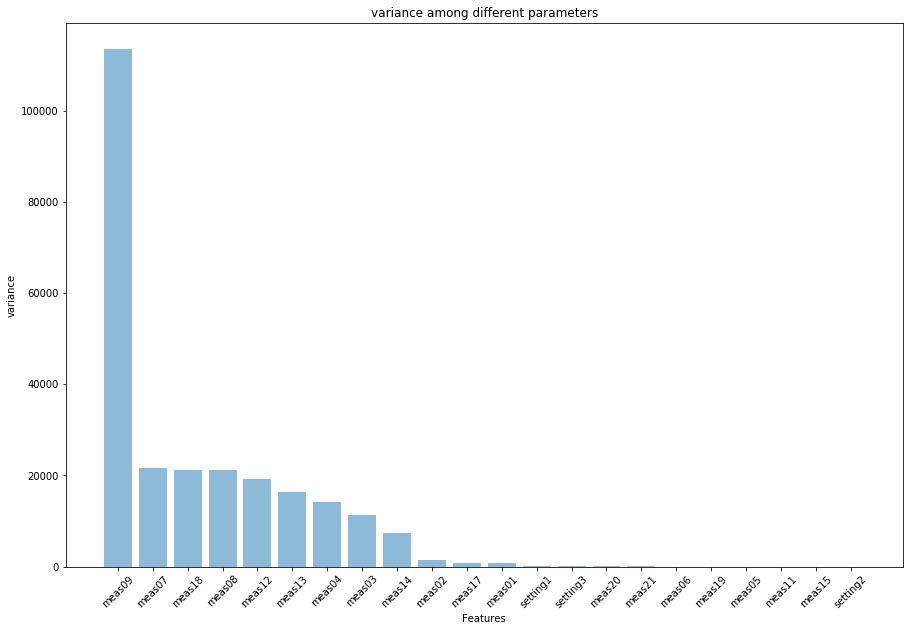

In [17]:
stats_plot(df_stats, [], 'variance', 'feature')

### Remove un-ncessary rows and columns from the data

In [18]:
df_raw.drop(columns=['meas22','meas23','meas24','meas25','meas26'], inplace=True)
df_raw.dropna(inplace=True)

### Writing to file

In [19]:
output_file = OUTPUT_DIR + 'train_case4.csv'
df_raw.to_csv(output_file, sep=',', index=False)

### Reading from a file to check vals

In [20]:
df_test = pd.read_csv(output_file)

In [21]:
df_test.head()

,unit,time_cycles,setting1,setting2,setting3,meas01,meas02,meas03,meas04,meas05,...,meas12,meas13,meas14,meas15,meas16,meas17,meas18,meas19,meas20,meas21
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754
